##### Code From Previous Parts in PyTorch Workflow

In [39]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import numpy as np

In [40]:
# Data points imported from lesson 19

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# parameters for creating the tensor: X

X = torch.arange(start, end, step).unsqueeze(dim = 1)
# adds an extra dimension so theres an extra square bracket and each element of X, y are on different lines in the output for betting viewing
y = weight * X + bias # is Linear Regression Formula


trainSplit = int(0.8 * len(X)) # creating the train split by multiplying the upper bounds of the train split by the length of X to get the total number

XTrain, yTrain = X[:trainSplit], y[:trainSplit] # indexing to get all samples up until the trainsplit
XTest, yTest = X[trainSplit:], y[trainSplit:] # indexing to get all the samples from the trainsplit onwards, or what is left over after the trainsplit

In [41]:
# using matplotlib to visualize the data points

def plotPredictions(trainData = XTrain, 
                    trainLabels = yTrain, 
                    testData = XTest, 
                    testLabels = yTest, 
                    prediction = None):
# Plots training data, test data and comparing predictions

    plt.figure(figsize = (10, 7)) 
    
    plt.scatter(trainData, trainLabels, c = "b", label = "Training Data")

    plt.scatter(testData, testLabels, c = "g", label = "Testing Data")

    if prediction is not None:
        plt.scatter(testData, prediction, c = "r", label = "Prediction")

    plt.legend(prop = {"size": 14})

In [42]:
# model imported from lesson 20

class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module, and can be considered the building blocks for pytorch
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # grad = True is set by default, one of the main algorithms for predictions
                                                dtype= torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad= True,
                                             dtype= torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: # -> means the return value, very similar to java, but for python its included outside of the method
        # 'x' is the input data
        return self.weights * x + self.bias # linear regression formula

In [43]:
# code imported from lesson 22
# creating a random seed
torch.manual_seed(246)

# creating an instance of the model which is a subclass of nn.Module
model0 = LinearRegressionModel() # type: ignore

In [44]:
# Code imported from lesson 25

lossFunction = nn.L1Loss()

optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr= 0.01, # learning rate - is the most important hyperparameter that the programmer can set, the smaller the learning rate, the smaller the change
                                      # in the parameters, and the larger the learning rate, the larger the change of the parameters
                            )

In [45]:
# Training Loop
torch.manual_seed(42)

epochCount = []
lossValues = []
testLossValues = []

# an epoch is a loop through the data, and is a hyperparameter since we set it ourselves 
epochs = 1000

# 1. Loop through the data (have to execute all the training loop steps in the for loop below
for epoch in range(epochs):
    # setting the model to training mode, which is the calling the function .train() on the model, in Pytorch train mode sets all parameters that need parameters to require parameters
    model0.train() # default mode/state of the model

    # 2. Forward Pass
    yPred = model0(XTrain) # learning patterns on the training data, and evaluating data on the test data, and uses the Forward method

    # 3. Calculating the Loss (Mean Absolute Error or MAE) or the distance from the test values(green dots), and the values that the model gave(red dots)
    loss = lossFunction(yPred, yTrain) # lossFunction = nn.L1Loss()
    print(f"loss:{loss}")

    # 4. Optimizer zero grad 
    optimizer.zero_grad() # optimizer = torch.optim.SGD(params=model0.parameters(),lr= 0.01,)

    # 5. Backpropagation with respect to the loss with the models parameters
    loss.backward()

    # 6. Optimizer step (perform the gradient descent), makes calculations in how the model should adjust the parameters based on the loss of the back propagation 
    optimizer.step() 
    # by default, the change of the optimizer will accumulate through the loop, so step 4 is imp
    # important to prevent the model from cycling different epochs, and .zero_grad will reset the epoch

    model0.eval() # turns off gradient tracking, and different settings in the model that are not needed for the testing/evaluation process

    # testing
    with torch.inference_mode():
        testPred = model0(XTest)

    testLoss = lossFunction(testPred, yTest)

    # printing out model state_dict()
    print(model0.state_dict())

    if epoch % 10 == 0:
        epochCount.append(epoch)
        lossValues.append(loss)
        testLossValues.append(testLoss)

loss:0.6108232736587524
OrderedDict([('weights', tensor([-0.7101])), ('bias', tensor([1.4492]))])
loss:0.599302351474762
OrderedDict([('weights', tensor([-0.7140])), ('bias', tensor([1.4392]))])
loss:0.5877813100814819
OrderedDict([('weights', tensor([-0.7179])), ('bias', tensor([1.4292]))])
loss:0.5762603878974915
OrderedDict([('weights', tensor([-0.7218])), ('bias', tensor([1.4192]))])
loss:0.5647394061088562
OrderedDict([('weights', tensor([-0.7257])), ('bias', tensor([1.4092]))])
loss:0.5533581972122192
OrderedDict([('weights', tensor([-0.7292])), ('bias', tensor([1.3997]))])
loss:0.5431011915206909
OrderedDict([('weights', tensor([-0.7327])), ('bias', tensor([1.3902]))])
loss:0.5328441262245178
OrderedDict([('weights', tensor([-0.7362])), ('bias', tensor([1.3807]))])
loss:0.5231264233589172
OrderedDict([('weights', tensor([-0.7393])), ('bias', tensor([1.3717]))])
loss:0.5140467882156372
OrderedDict([('weights', tensor([-0.7425])), ('bias', tensor([1.3627]))])
loss:0.50520193576812

In [46]:
model0.state_dict()

# each time that the training loop is run, the loss is getting smaller and smaller, and consequently the model's parameters are getting closer and closer to the the bias and weight of the original function

OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.2992]))])

In [47]:
with torch.inference_mode():
    yPredNew = model0(XTest)

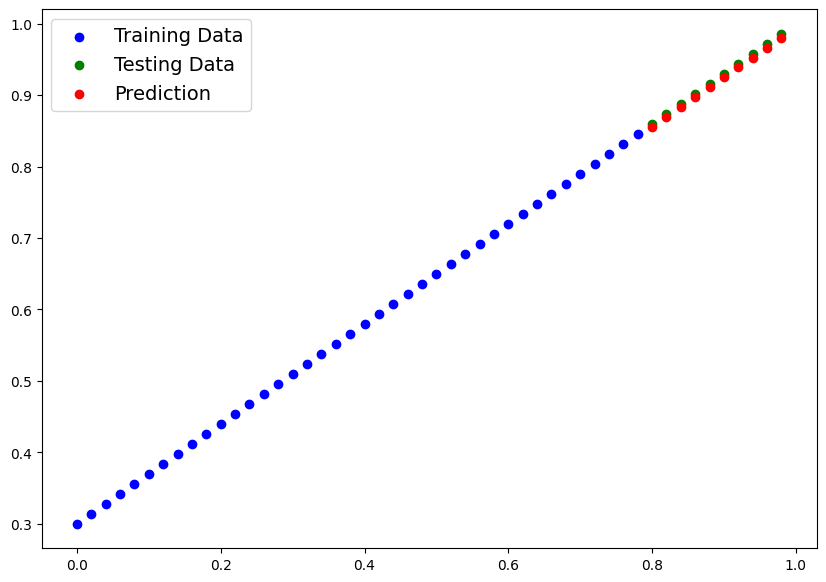

In [48]:
plotPredictions(prediction=yPredNew) # to use the matplotlib function, you have to call prediction = the new predictions that was called

# since i ran the code almost 10000 times, the predictions that the model gave is very similar to the testing data line, but as the number of predictions kept increasing, the loss seems to be stagnating and not decreasing as much anymore
# after some more testing it seems that the best number of epochs to run seems to be 10000, and is the closest to the parameters

### Writing Testing Loop Code

Trying to get the red dots(predictions) to line up with the green dots(testing value), after training the model for 100 epochs, the red line(predictions) is getting closer and closer to the green dots(testing value)

Ways:
* Training the model for longer (have already done that for almost 100,000 epochs, and have gotten loss very low)


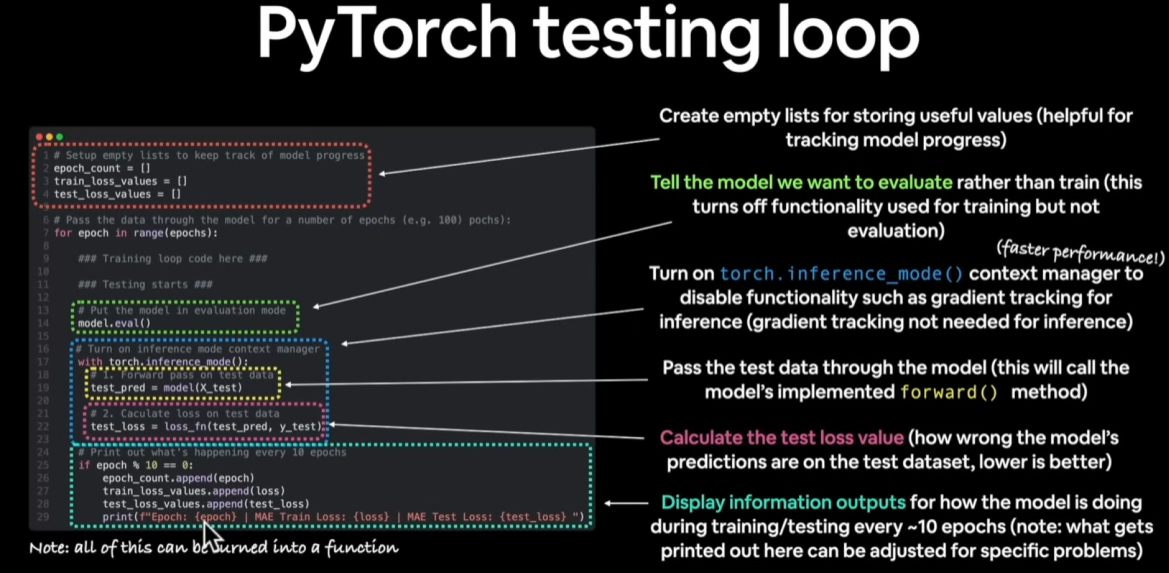

In [49]:
# Tracking Different Values: to improve our current model with a new model using the current models parameters, taking the values that we tracked in order to compare 
# future models to current models

epochCount, lossValues, testLossValues

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200,
  210,
  220,
  230,
  240,
  250,
  260,
  270,
  280,
  290,
  300,
  310,
  320,
  330,
  340,
  350,
  360,
  370,
  380,
  390,
  400,
  410,
  420,
  430,
  440,
  450,
  460,
  470,
  480,
  490,
  500,
  510,
  520,
  530,
  540,
  550,
  560,
  570,
  580,
  590,
  600,
  610,
  620,
  630,
  640,
  650,
  660,
  670,
  680,
  690,
  700,
  710,
  720,
  730,
  740,
  750,
  760,
  770,
  780,
  790,
  800,
  810,
  820,
  830,
  840,
  850,
  860,
  870,
  880,
  890,
  900,
  910,
  920,
  930,
  940,
  950,
  960,
  970,
  980,
  990],
 [tensor(0.6108, grad_fn=<MeanBackward0>),
  tensor(0.5052, grad_fn=<MeanBackward0>),
  tensor(0.4380, grad_fn=<MeanBackward0>),
  tensor(0.3947, grad_fn=<MeanBackward0>),
  tensor(0.3660, grad_fn=<MeanBackward0>),
  tensor(0.3463, grad_fn=<MeanBackward0>),
  tensor(0.3322, grad_fn=<MeanBackward0>),
  tensor(

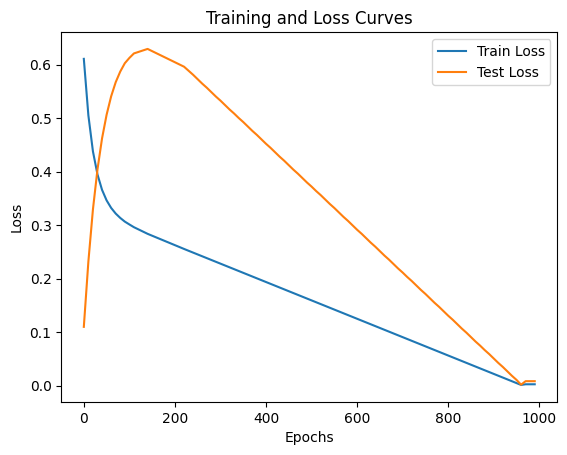

In [50]:
# plotting the loss curves to see how they change as the number of epochs or training loops goes up

plt.plot(epochCount, np.array(torch.tensor(lossValues).cpu().numpy()), label = "Train Loss")
plt.plot(epochCount, testLossValues, label = "Test Loss")
plt.title("Training and Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()